In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import cv2
from PIL import Image as Image_PIL
from os import listdir
from matplotlib.image import imread
import time
from random import sample
from sklearn import manifold, decomposition, preprocessing
from sklearn.model_selection import train_test_split


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

D:\Users\Damien\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Dataframe

In [2]:
df = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P6\Dataset\images_clean.csv")
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets


### CNN

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

### NLP

#### Bag of Words

In [4]:
df[['description']].sample(5)

,description
632,Key Features of Lilliput Solid Baby Boy's Blue...
547,Maxima 01727LPLN Mac Gold Analog Watch - For ...
92,Buy Exotic India Vaishnava Symbols - Shankha A...
372,"Flipkart.com: Buy Wild Stone Charge,Surge Comb..."
615,Specifications of Boreal Plastic rectangular h...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from nltk.corpus import stopwords

In [6]:
import nltk

In [7]:
stopwords_en = set(nltk.corpus.stopwords.words('english'))
stopwords_nltk = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
stopwords_combined = set.union(stopwords_en, stopwords_nltk, stopwords_punct)

In [8]:
print('ponctuation : ', list(stopwords_punct)[0:4])
print('stopwords : ', list(stopwords_nltk)[0:4])

ponctuation :  ['\\', '"', ':', '}']
stopwords :  ['your', 'd', 'now', 'me']


In [9]:
list_sentences = [sent for sent in df['description']]

In [10]:
print("nombre de phrases: ", len(list_sentences))

nombre de phrases:  1050


In [11]:
corpus = ' '.join(df['description'].values)
print("nombre total de mots: ", len(corpus.split()))

nombre total de mots:  80013


#### Test comptage de mots

In [12]:
sentence = list_sentences[0]

tokens = nltk.word_tokenize(sentence)

In [13]:
sentence

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [14]:
tokens

['Key',
 'Features',
 'of',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'Floral',
 'Curtain',
 ',',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 '(',
 '213',
 'cm',
 'in',
 'Height',
 ',',
 'Pack',
 'of',
 '2',
 ')',
 'Price',
 ':',
 'Rs',
 '.',
 '899',
 'This',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors.This',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 '%',
 'high',
 'quality',
 'polyester',
 'fabric.It',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'Metal',
 'Ring.It',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving.This',
 'curtain',
 'is',
 'ant-',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance.Give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 '.',
 'The',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 '.',
 

In [15]:
from collections import Counter

In [16]:
Counter(tokens)

Counter({'Key': 1,
         'Features': 1,
         'of': 9,
         'Elegance': 4,
         'Polyester': 5,
         'Multicolor': 4,
         'Abstract': 4,
         'Eyelet': 4,
         'Door': 5,
         'Curtain': 5,
         'Floral': 1,
         ',': 5,
         '(': 2,
         '213': 3,
         'cm': 3,
         'in': 6,
         'Height': 2,
         'Pack': 3,
         '2': 5,
         ')': 2,
         'Price': 1,
         ':': 1,
         'Rs': 1,
         '.': 4,
         '899': 1,
         'This': 1,
         'curtain': 4,
         'enhances': 1,
         'the': 12,
         'look': 1,
         'interiors.This': 1,
         'is': 3,
         'made': 1,
         'from': 1,
         '100': 1,
         '%': 1,
         'high': 1,
         'quality': 1,
         'polyester': 1,
         'fabric.It': 1,
         'features': 1,
         'an': 1,
         'eyelet': 2,
         'style': 1,
         'stitch': 1,
         'with': 2,
         'Metal': 1,
         'Ring.It': 1,
 

#### Preprocessing (Stemmer - Lemmatizer)

In [17]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [18]:
from nltk.stem.snowball import EnglishStemmer
import spacy

stemmer = EnglishStemmer()
lemmatizer = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [19]:
def tokenize_clean(document, stopwords=None, keep_tags=None,  # ('NN' or 'JJ')
                   lemmatizer=None, stemmer=None):
    # 1 - tokenizing
    tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')
    li_words = tokenizer.tokenize(document)
    # 2 - lower case
    li_words = [s.lower() for s in li_words]
    # 3 - Garder certain tags
    if keep_tags is not None:
        li_words = [word for word, tag in nltk.pos_tag(li_words)
                    if tag in keep_tags]
    if stopwords is None:
        stopwords = []
    # 4 - lemmatizing - stemming
    if lemmatizer is not None:
        lem_doc = lemmatizer(' '.join(li_words))
        li_words = [token.lemma_ for token in lem_doc]
    elif stemmer is not None:
        li_words = [stemmer.stem(s) for s in li_words]
    # 5 - Suppression des stopwords
    li_words = [s for s in li_words if s not in stopwords]

    return li_words

In [20]:
df['desc_clean'] = \
    df['description'].apply(lambda x:
                            tokenize_clean(x,
                                           stopwords=stopwords_en,
                                           keep_tags=['NN', 'JJ'],
                                           stemmer=None,
                                           lemmatizer=lemmatizer))\
    .apply(lambda x: ' '.join(x))

df['pname_clean'] = \
    df['product_name'].apply(lambda x:
                             tokenize_clean(x,
                                            stopwords=stopwords_en,
                                            keep_tags=['NN', 'JJ'],
                                            stemmer=None,
                                            lemmatizer=lemmatizer))\
    .apply(lambda x: ' '.join(x))

In [21]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,desc_clean,pname_clean
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,key elegance polyester multicolor abstract eye...,elegance polyester multicolor abstract eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,sathiyas cotton bath towel bath towel yellow b...,sathiyas cotton bath towel
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,key eurospa cotton terry face towel size small...,eurospa cotton terry face towel set


In [22]:
df['pname_clean'][0]

'elegance polyester multicolor abstract eyelet door curtain'

In [23]:
df['desc_clean'][0]

'key elegance polyester multicolor abstract eyelet door floral curtain elegance polyester multicolor abstract eyelet door curtain cm height pack price r curtain look curtain high quality polyester fabric eyelet style stitch metal room environment romantic curtain ant wrinkle anti shrinkage elegant apparance home bright modernistic appeal surreal attention sure contemporary eyelet valance first thing morning bright sun good morning whole world evening special joyous beauty soothe home elegant curtain light room right amount sunlight elegance polyester multicolor abstract eyelet door curtain cm height pack general brand elegance door type eyelet model name abstract polyester door curtain set model -PRON- duster color multicolor cm box number pack package body design material polyester'

In [24]:
sentence_tokenized = tokenize_clean(sentence,
                                    stopwords=stopwords_en,
                                    keep_tags=['NN', 'JJ'],
                                    stemmer=None,
                                    lemmatizer=lemmatizer)

In [25]:
Counter(tokens)

Counter({'Key': 1,
         'Features': 1,
         'of': 9,
         'Elegance': 4,
         'Polyester': 5,
         'Multicolor': 4,
         'Abstract': 4,
         'Eyelet': 4,
         'Door': 5,
         'Curtain': 5,
         'Floral': 1,
         ',': 5,
         '(': 2,
         '213': 3,
         'cm': 3,
         'in': 6,
         'Height': 2,
         'Pack': 3,
         '2': 5,
         ')': 2,
         'Price': 1,
         ':': 1,
         'Rs': 1,
         '.': 4,
         '899': 1,
         'This': 1,
         'curtain': 4,
         'enhances': 1,
         'the': 12,
         'look': 1,
         'interiors.This': 1,
         'is': 3,
         'made': 1,
         'from': 1,
         '100': 1,
         '%': 1,
         'high': 1,
         'quality': 1,
         'polyester': 1,
         'fabric.It': 1,
         'features': 1,
         'an': 1,
         'eyelet': 2,
         'style': 1,
         'stitch': 1,
         'with': 2,
         'Metal': 1,
         'Ring.It': 1,
 

In [26]:
Counter(sentence_tokenized)

Counter({'key': 1,
         'elegance': 4,
         'polyester': 6,
         'multicolor': 4,
         'abstract': 4,
         'eyelet': 6,
         'door': 5,
         'floral': 1,
         'curtain': 8,
         'cm': 3,
         'height': 2,
         'pack': 3,
         'price': 1,
         'r': 1,
         'look': 1,
         'high': 1,
         'quality': 1,
         'fabric': 1,
         'style': 1,
         'stitch': 1,
         'metal': 1,
         'room': 2,
         'environment': 1,
         'romantic': 1,
         'ant': 1,
         'wrinkle': 1,
         'anti': 1,
         'shrinkage': 1,
         'elegant': 2,
         'apparance': 1,
         'home': 2,
         'bright': 2,
         'modernistic': 1,
         'appeal': 1,
         'surreal': 1,
         'attention': 1,
         'sure': 1,
         'contemporary': 1,
         'valance': 1,
         'first': 1,
         'thing': 1,
         'morning': 2,
         'sun': 1,
         'good': 1,
         'whole': 1,
       

In [27]:
df.to_csv(
    r'C:\Users\Damien\Desktop\Data Scientist\P6\Dataset\df_clean.csv', index=False)

#### Evaluation des frequences

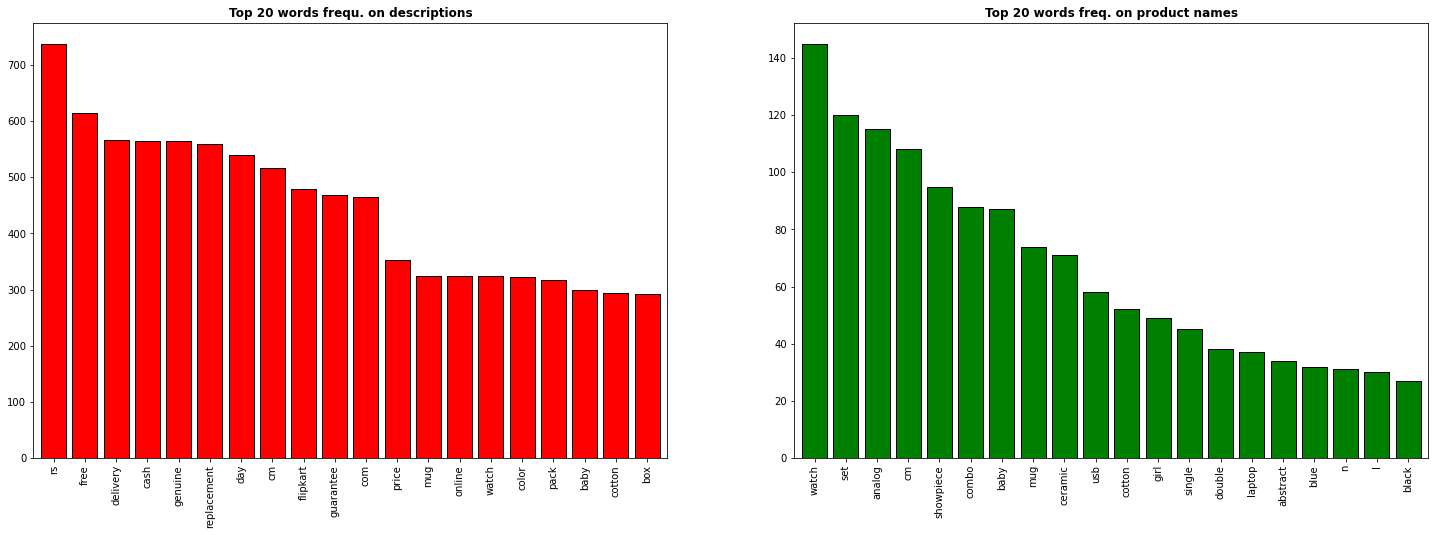

In [28]:
# creation of a corpus of all the cleaned descriptions and product_names
corpus_desc = ' '.join(df['desc_clean'].values)
corpus_pname = ' '.join(df['pname_clean'].values)
# tokenizing the words in the cleaned corpus
tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
li_words_desc = tokenizer.tokenize(corpus_desc.lower())
li_words_pname = tokenizer.tokenize(corpus_pname.lower())
# counting frequency of each word
ser_freq_desc = pd.Series(nltk.FreqDist(li_words_desc))
ser_freq_pname = pd.Series(nltk.FreqDist(li_words_pname))

fig = plt.figure(figsize=(25, 8))
# plotting the most frequent words
ax = fig.add_subplot(1, 2, 1)
ser_freq_desc.sort_values(ascending=False)[0:20].plot.bar(width=0.8,
                                                          color='red',
                                                          ec='k',
                                                          ax=ax)
ax.set_title("Top 20 words frequ. on descriptions", fontweight='bold')
ax = fig.add_subplot(1, 2, 2)
ser_freq_pname.sort_values(ascending=False)[0:20].plot.bar(width=0.8,
                                                           color='green',
                                                           ec='k',
                                                           ax=ax)
ax.set_title("Top 20 words freq. on product names", fontweight='bold')
plt.show()

In [29]:
from wordcloud import WordCloud

In [30]:
text_cloud = df['desc_clean'][0]

In [31]:
wordcloud = WordCloud(
    max_words=20, background_color="white").generate(text_cloud)

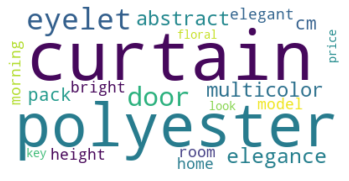

In [32]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
def plot_wordclouds_from_gb(gb, n_top_words, n_rows=1, figsize=(18, 8),
                            backgnd_color='black', cmap='Dark2',
                            random_state=None):

    fig = plt.figure(figsize=figsize)

    for i, tup in enumerate(gb, 1):
        n_topic, ser_texts = tup
        # creation of a corpus of all the cleaned descriptions and product_names
        corpus = ' '.join(ser_texts.values)
        # tokenizing the words in the cleaned corpus
        tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
        li_words = tokenizer.tokenize(corpus.lower())
        # counting frequency of each word
        ser_freq = pd.Series(nltk.FreqDist(li_words))

        wc = WordCloud(stopwords=None, background_color=backgnd_color,
                       colormap=cmap, max_font_size=150,
                       random_state=14)
        ser_topic = ser_freq\
            .sort_values(ascending=False)[0:n_top_words]
        wc.generate(' '.join(list(ser_topic.index)))

        n_tot = len(gb)
        n_cols = (n_tot//n_rows)+((n_tot % n_rows) > 0)*1
        ax = fig.add_subplot(n_rows, n_cols, i)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.tight_layout()
        plt.title(n_topic, fontweight='bold')

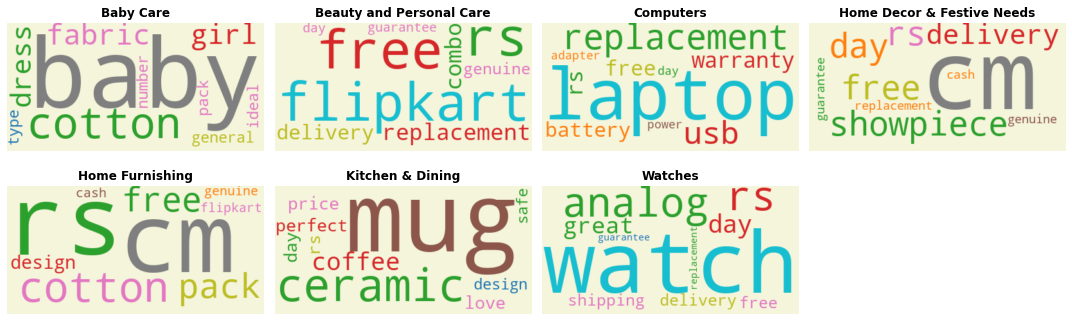

In [34]:
gb = df.groupby('cat_lvl_1')['desc_clean']

plot_wordclouds_from_gb(gb, n_top_words=10, n_rows=2, figsize=(15, 5),
                        backgnd_color='beige', cmap='tab10', random_state=14)

### TF-IDF

#### Train - Test set

In [35]:
train_NLP, test_NLP = train_test_split(df, test_size=0.25, random_state=42)

In [36]:
train_NLP.to_csv('C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/train.csv')
test_NLP.to_csv('C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/test.csv')

#### Model

In [37]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(train_NLP['desc_clean'])
X1

<787x2842 sparse matrix of type '<class 'numpy.float64'>'
	with 18225 stored elements in Compressed Sparse Row format>

In [38]:
print(X1)

  (0, 2297)	0.17885963608855535
  (0, 1982)	0.18982745125207995
  (0, 2169)	0.2190239988450008
  (0, 1463)	0.20674605981149205
  (0, 1867)	0.23485301530455685
  (0, 1845)	0.19491007177242106
  (0, 1850)	0.2571627609738687
  (0, 664)	0.16860729768262414
  (0, 590)	0.2544781991410078
  (0, 861)	0.24272679621158302
  (0, 634)	0.09414771219864629
  (0, 2404)	0.2571627609738687
  (0, 988)	0.23485301530455685
  (0, 2560)	0.2571627609738687
  (0, 1964)	0.058335569074059145
  (0, 1639)	0.29104453701424193
  (0, 397)	0.28720505848726346
  (0, 618)	0.13147998539881078
  (0, 2132)	0.38171729871151167
  (1, 1099)	0.06616294435058019
  (1, 2088)	0.06474084377723027
  (1, 1035)	0.05954473719736046
  (1, 651)	0.059372050861654306
  (1, 379)	0.05954473719736046
  (1, 982)	0.05760606272478218
  :	:
  (785, 2741)	0.6295247693936198
  (785, 1099)	0.09321067528736462
  (785, 2088)	0.091207213136918
  (785, 1035)	0.08388691311205163
  (785, 651)	0.08364363176896658
  (785, 379)	0.08388691311205163
  (785, 

In [39]:
# nltk.download('wordnet')

In [40]:
def affiche_liste(liste):
    return liste


description_example = train_NLP['description'][40]
print('======== PRE TRAITEMENT ========')
print(affiche_liste(description_example), '\n')
# lowercase
description_example = description_example.lower()
print('======== LOWERCASE ========')
print(affiche_liste(description_example), '\n')

# tokenizer
description_example = word_tokenize(description_example)
print('======== TOKENIZER ========')
print(affiche_liste(description_example), '\n')

# stopwords
description_example = [
    w for w in description_example if not w in stopwords_combined]
print('======== STOPWORDS ========')
print(affiche_liste(description_example), '\n')

# lemmatizer
lemm = WordNetLemmatizer()
description_example = [lemm.lemmatize(el) for el in description_example]
print('======== LEMMATISATION ========')
print(affiche_liste(description_example), '\n')

transformation = []
for i, el in enumerate(X1.todense()[4, :].tolist()[0]):
    if el != 0:
        transformation.append((vectorizer.get_feature_names()[i], el))
pd.DataFrame(transformation, columns=['mot', 'tfidf']).sort_values(
    by='tfidf', ascending=False).head(10)

======== PRE TRAITEMENT ========
Key Features of Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Fabric: Cotton Brand Color: Green,Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Price: Rs. 309 Girls Pyjama set,Specifications of Mom and Kid Baby Girl's Printed Green Top & Pyjama Set General Details Pattern Printed Ideal For Baby Girl's Night Suit Details Fabric Cotton Type Top & Pyjama Set Neck Round Neck In the Box 1 Top & Pyjama Set 

======== LOWERCASE ========
key features of mom and kid baby girl's printed green top & pyjama set fabric: cotton brand color: green,mom and kid baby girl's printed green top & pyjama set price: rs. 309 girls pyjama set,specifications of mom and kid baby girl's printed green top & pyjama set general details pattern printed ideal for baby girl's night suit details fabric cotton type top & pyjama set neck round neck in the box 1 top & pyjama set 

======== TOKENIZER ========
['key', 'features', 'of', 'mom', 'and', 'kid', 'baby', 'girl', "'s"

,mot,tfidf
4,fan,0.659088
12,usb,0.470512
3,epresent,0.401673
8,mfan,0.401673
9,online,0.062420
7,guarantee,0.051662
10,replacement,0.050552
1,day,0.049259
0,cash,0.046495
6,genuine,0.046495


In [41]:
from sklearn.cluster import KMeans

#### Bag of Words (feature extractor)

In [42]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
bow_vectorizer = CountVectorizer(
    tokenizer=nltk.word_tokenize,
    stop_words=stopwords_combined)
X_bow = bow_vectorizer.fit_transform(df['desc_clean'])

D:\Users\Damien\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [44]:
X_bow

<1050x3475 sparse matrix of type '<class 'numpy.int64'>'
	with 25485 stored elements in Compressed Sparse Row format>

#### Reduction dimensions (LSA)

In [45]:
from sklearn.decomposition import TruncatedSVD

In [46]:
print("Dimensions dataset avant réduction LSA : ", X_bow.shape)
svd = TruncatedSVD(n_components=500, n_iter=7, random_state=42)
feat_svd = svd.fit_transform(X_bow)
print("Dimensions dataset après réduction LSA : ", feat_svd.shape)

Dimensions dataset avant réduction LSA :  (1050, 3475)
Dimensions dataset après réduction LSA :  (1050, 500)


#### Clustering K-Means

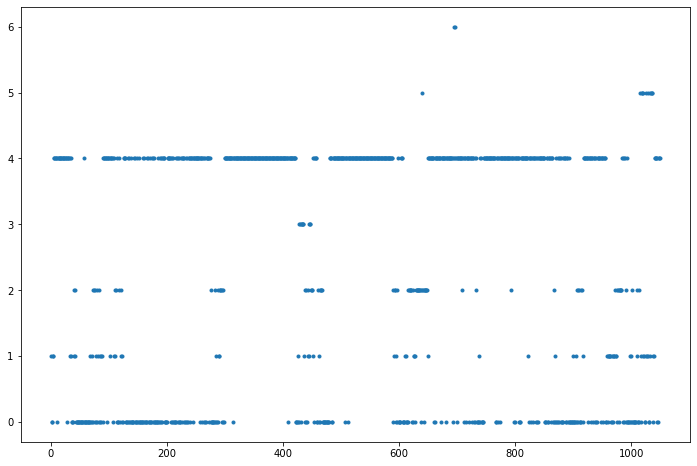

In [47]:
kmeans = KMeans(n_clusters=7, init='k-means++')
y_kmeans = kmeans.fit_predict(feat_svd)
plt.figure(figsize=(12, 8))
plt.plot(y_kmeans, ".")
plt.show()

In [48]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [49]:
# # Optimal clusters is

true_k = 7

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit_predict(X_bow)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = bow_vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 cm
 pack
 baby
 color
 box
 type
 general
 price
 cotton
 number
Cluster 1:
 adapter
 vgn
 replacement
 cr
 vaio
 warranty
 smartpro
 e
 power
 product
Cluster 2:
 rs
 free
 delivery
 genuine
 cash
 day
 flipkart
 replacement
 guarantee
 com
Cluster 3:
 cm
 sheet
 bedsheet
 cotton
 inch
 cover
 double
 pillow
 length
 flat
Cluster 4:
 battery
 quality
 laptop
 replacement
 lapguard
 label
 etc
 durability
 rohs
 authentication
Cluster 5:
 mug
 coffee
 ceramic
 perfect
 tea
 love
 ml
 material
 quality
 printland
Cluster 6:
 skin
 laptop
 print
 mouse
 pad
 combo
 multicolor
 warranty
 easy
 price


In [50]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = bow_vectorizer.transform([product])
    prediction = model.predict(Y)
    # print(prediction)
    print_cluster(prediction[0])

In [51]:
show_recommendations("beautiful watch")

Cluster 2:
 rs
 free
 delivery
 genuine
 cash
 day
 flipkart
 replacement
 guarantee
 com


In [52]:
le = preprocessing.LabelEncoder()
df["nlp_label"] = le.fit_transform(df["cat_lvl_1"])

In [53]:
from sklearn import cluster, metrics
print("ARI : ", metrics.adjusted_rand_score(df["nlp_label"], model.labels_))

ARI :  0.04573344865252744


<AxesSubplot:>

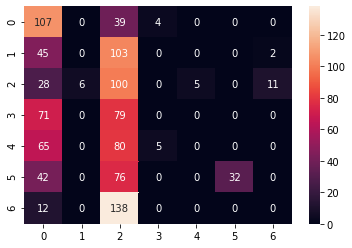

In [54]:
conf_mat = metrics.confusion_matrix(df["nlp_label"], model.labels_)
sns.heatmap(conf_mat, annot=True, fmt=".0f")

In [55]:
list_labels = ['Home Furnishing', 'Baby Care', 'Watches',
               'Home Decor & Festive Needs', 'Kitchen & Dining',
               'Beauty and Personal Care', 'Computers']

<AxesSubplot:>

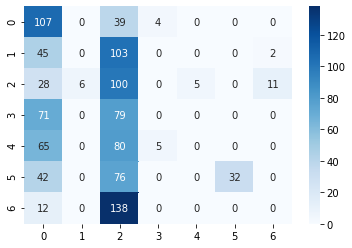

In [56]:
df_cm = pd.DataFrame(conf_mat, index=[label for label in list_labels],
                     columns=[i for i in "0123456"])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt=".0f", cmap="Blues")

In [57]:
print(metrics.classification_report(df["nlp_label"], model.labels_))

              precision    recall  f1-score   support

           0       0.29      0.71      0.41       150
           1       0.00      0.00      0.00       150
           2       0.16      0.67      0.26       150
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       150
           5       1.00      0.21      0.35       150
           6       0.00      0.00      0.00       150

    accuracy                           0.23      1050
   macro avg       0.21      0.23      0.15      1050
weighted avg       0.21      0.23      0.15      1050



### Reduction de dimension LDA

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
tf_vectorizer = CountVectorizer(
    tokenizer=nltk.word_tokenize,
    stop_words=stopwords_combined)
tf = tf_vectorizer.fit_transform(train_NLP['description'])

D:\Users\Damien\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [60]:
lda = LatentDirichletAllocation(n_components=df['cat_lvl_1'].nunique(),
                                random_state=2)

In [61]:
lda.fit(tf)

LatentDirichletAllocation(n_components=7, random_state=2)

In [62]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [63]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words=10)

Topic #0: baby 's cm cotton 1 fabric details pack specifications general
Topic #1: skin laptop usb print shapes pad multicolor mouse set warranty
Topic #2: mug warranty product quality adapter material power battery made laptop
Topic #3: pack sticker glass 1 wall price color features rs water
Topic #4: mug '' ceramic rockmantra safe 4 design 3.5 specifications gift
Topic #5: towel bath products eyelet curtain beauty usb face oxyglow door
Topic #6: free delivery buy cash genuine shipping products 30 day flipkart.com



In [64]:
lda.transform(tf_vectorizer.transform(test_NLP['description']))

array([[9.52521142e-03, 9.52560900e-03, 9.52611347e-03, ...,
        9.52671499e-03, 9.52627062e-03, 9.42844421e-01],
       [5.71450881e-03, 5.72119067e-03, 3.34540688e-01, ...,
        5.71507101e-03, 5.71615627e-03, 6.36877580e-01],
       [8.51462292e-04, 8.51337309e-04, 9.68267043e-01, ...,
        8.50704533e-04, 8.50761504e-04, 8.51023815e-04],
       ...,
       [7.90943012e-01, 9.53391394e-03, 9.53071280e-03, ...,
        9.53287111e-03, 8.51578053e-02, 9.53693050e-03],
       [7.84963396e-02, 4.76372966e-03, 4.76238237e-03, ...,
        4.76306095e-03, 4.76345413e-03, 8.97688616e-01],
       [4.93364785e-03, 4.92687687e-03, 4.92657890e-03, ...,
        4.92821457e-03, 4.93016148e-03, 9.70426483e-01]])

In [65]:
lda.transform(tf_vectorizer.transform(train_NLP['description']))[1, :]

array([0.00476604, 0.00476411, 0.00476409, 0.00476332, 0.00476226,
       0.00476238, 0.9714178 ])

In [66]:
lda.transform(tf_vectorizer.transform(train_NLP['description'])).shape

(787, 7)

**Topic le plus représenté par catégorie d'article**

In [67]:
val_best_topic = {}
best_topic = {}
matrix = lda.transform(tf_vectorizer.transform(train_NLP['description']))
for i in range(0, matrix.shape[0]):
    val_best_topic[i] = 0
    for j in range(0, matrix.shape[1]):
        if matrix[i, j] > val_best_topic[i]:
            val_best_topic[i] = matrix[i, j]
            best_topic[i] = j

In [68]:
train_lda = train_NLP.copy()
train_lda['topic_lda'] = list(best_topic.values())

In [69]:
train_lda[['cat_lvl_1', 'topic_lda']].groupby(['cat_lvl_1']).count()

,topic_lda
cat_lvl_1,
Baby Care,112
Beauty and Personal Care,123
Computers,104
Home Decor & Festive Needs,112
Home Furnishing,105
Kitchen & Dining,119
Watches,112


In [70]:
train_lda[['cat_lvl_1', 'topic_lda']].groupby(
    ['cat_lvl_1', 'topic_lda']).size()

cat_lvl_1                   topic_lda
Baby Care                   0             74
                            1              4
                            2              3
                            3              3
                            4              2
                            5              1
                            6             25
Beauty and Personal Care    0              7
                            1              2
                            2              9
                            3             13
                            4              4
                            5              8
                            6             80
Computers                   0              2
                            1             18
                            2             21
                            3              5
                            5              4
                            6             54
Home Decor & Festive Needs  0             19
                 

### Approche classique

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(train_NLP['desc_clean'])
feat_train = pipe.transform(train_NLP['desc_clean'])
feat_train.shape

(787, 2877)

In [72]:
feat_train.min(), feat_train.max()

(0.0, 0.9392682690689905)

In [73]:
feat_test = pipe.transform(test_NLP['desc_clean'])
feat_test.shape

(263, 2877)

In [74]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [75]:
encoder = LabelEncoder()
y_train_TFIDF = encoder.fit_transform(train_NLP['cat_lvl_1'])
y_test_TFIDF = encoder.fit_transform(test_NLP['cat_lvl_1'])

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(feat_train, y_train_TFIDF)

RandomForestClassifier(n_estimators=50)

In [77]:
clf.score(feat_test, y_test_TFIDF)

0.9429657794676806

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(feat_train, y_train_TFIDF)
lr.score(feat_test, y_test_TFIDF)

0.9467680608365019

In [79]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(feat_train, y_train_TFIDF)
mnb.score(feat_test, y_test_TFIDF)

0.8935361216730038

In [80]:
# On test la performance en augmentant la profondeur de l'arbre
clf20 = RandomForestClassifier(n_estimators=50, max_depth=20)
clf20.fit(feat_train, y_train_TFIDF)
clf20.score(feat_test, y_test_TFIDF)

0.9467680608365019

In [81]:
clf40 = RandomForestClassifier(n_estimators=50, max_depth=40)
clf40.fit(feat_train, y_train_TFIDF)
clf40.score(feat_test, y_test_TFIDF)

0.9277566539923955

In [82]:
clf400 = RandomForestClassifier(n_estimators=200, max_depth=40)
clf400.fit(feat_train, y_train_TFIDF)
clf400.score(feat_test, y_test_TFIDF)

0.9467680608365019

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# Estimator
Random_Forest = RandomForestClassifier()

params = {
    'n_estimators': [5, 10, 20, 50, 100, 200],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_depth': [20, 40, 60],
    'max_features': ['auto', 'sqrt']
}


grid_CL = GridSearchCV(Random_Forest, param_grid=params, cv=5)

In [86]:
grid_CL.fit(feat_train, y_train_TFIDF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 40, 60],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [5, 10, 20, 50, 100, 200]})

In [87]:
grid_CL.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [88]:
best_model_RF = grid_CL.best_estimator_

In [89]:
best_model_RF.score(feat_test, y_test_TFIDF)

0.9467680608365019

In [90]:
# Estimator
Random_Forest = RandomForestClassifier()

params = {
    'n_estimators': [5, 10, 20, 50, 100, 200],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_depth': [20, 40, 60],
    'max_features': ['auto', 'sqrt']
}


grid_CL = GridSearchCV(Random_Forest, param_grid=params, cv=5)

#### Avec ACP

In [91]:
from sklearn.decomposition import TruncatedSVD
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(train_NLP['desc_clean'])
feat_train_svd = pipe_svd.transform(train_NLP['desc_clean'])
feat_train_svd.shape

(787, 300)

In [92]:
clf_svd = RandomForestClassifier(n_estimators=50)
clf_svd.fit(feat_train_svd, y_train_TFIDF)

RandomForestClassifier(n_estimators=50)

In [93]:
feat_test_svd = pipe_svd.transform(test_NLP['desc_clean'])
clf_svd.score(feat_test_svd, y_test_TFIDF)

0.8821292775665399

In [94]:
lr_svd = LogisticRegression()
lr_svd.fit(feat_train_svd, y_train_TFIDF)
lr_svd.score(feat_test_svd, y_test_TFIDF)

D:\Users\Damien\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9391634980988594

#### TFIDF avec ACP

In [95]:
pipe_svd_tfidf = make_pipeline(CountVectorizer(),
                               TfidfTransformer(),
                               TruncatedSVD(n_components=300))
pipe_svd_tfidf.fit(train_NLP['desc_clean'])
feat_train_svd_tfidf = pipe_svd_tfidf.transform(train_NLP['desc_clean'])

clf_svd_tfidf = LogisticRegression()
clf_svd_tfidf.fit(feat_train_svd_tfidf, y_train_TFIDF)

feat_test_svd_tfidf = pipe_svd_tfidf.transform(test_NLP['desc_clean'])
clf_svd_tfidf.score(feat_test_svd_tfidf, y_test_TFIDF)

0.9505703422053232

In [96]:
clf_rf_tfidf = RandomForestClassifier()
clf_rf_tfidf.fit(feat_train_svd_tfidf, y_train_TFIDF)

clf_rf_tfidf.score(feat_test_svd_tfidf, y_test_TFIDF)

0.9163498098859315

In [97]:
clf_mnb_tfidf = MultinomialNB()
clf_mnb_tfidf.fit(feat_train_svd_tfidf, y_train_TFIDF)

clf_mnb_tfidf.score(feat_test_svd_tfidf, y_test_TFIDF)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [98]:
proba = clf_svd_tfidf.predict_proba(feat_test_svd_tfidf)

In [99]:
proba[1]

array([0.06216973, 0.08414794, 0.11970898, 0.1594661 , 0.04890794,
       0.46838895, 0.05721035])

### Methode supervisée

#### Preparation données

In [100]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [101]:
# vectorizer = TfidfVectorizer(stop_words='english')
X_train_sup = vectorizer.transform(train_NLP['desc_clean'])
X_test_sup = vectorizer.transform(test_NLP['desc_clean'])

In [102]:
encoder = LabelEncoder()
y_train_RF = encoder.fit_transform(train_NLP['cat_lvl_1'])
y_test_RF = encoder.fit_transform(test_NLP['cat_lvl_1'])

**LDA**

In [103]:
tf_vectorizer = CountVectorizer(
    tokenizer=nltk.word_tokenize,
    stop_words=stopwords_combined)
tf2 = tf_vectorizer.fit_transform(train_NLP['desc_clean'])

D:\Users\Damien\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [104]:
lda2 = LatentDirichletAllocation(n_components=df['cat_lvl_1'].nunique(),
                                 random_state=2)

In [105]:
lda2.fit(tf2)

LatentDirichletAllocation(n_components=7, random_state=2)

#### Avec Support Vector Machine

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [107]:
params = {'penalty': ['l1', 'l2']}
grid_sgd = GridSearchCV(SGDClassifier(), param_grid=params, cv=5)

In [108]:
# tf = tf_vectorizer.fit_transform(train_NLP['description'])
grid_sgd.fit(X_train_sup, y_train_RF)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'penalty': ['l1', 'l2']})

In [109]:
grid_sgd.best_estimator_

SGDClassifier()

In [110]:
print('accuracy sur jeu train : ',
      accuracy_score(grid_sgd.best_estimator_.predict(X_train_sup), y_train_RF))
print('accuracy sur jeu test : ',
      accuracy_score(grid_sgd.best_estimator_.predict(X_test_sup), y_test_RF))

accuracy sur jeu train :  1.0
accuracy sur jeu test :  0.9657794676806084


#### Avec Support Vector Machine post LDA

In [111]:
params = {'penalty': ['l1', 'l2']}
grid_sgd2 = GridSearchCV(SGDClassifier(), param_grid=params, cv=5)

In [112]:
grid_sgd2.fit(lda2.transform(tf2), y_train_RF)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'penalty': ['l1', 'l2']})

In [113]:
grid_sgd2.best_estimator_

SGDClassifier(penalty='l1')

In [114]:
print('accuracy sur jeu train : ',
      accuracy_score(grid_sgd2.best_estimator_.predict(
          lda2.transform(tf_vectorizer.transform(train_NLP['desc_clean']))), y_train_RF))
print('accuracy sur jeu test : ',
      accuracy_score(grid_sgd2.best_estimator_.predict(
          lda2.transform(tf_vectorizer.transform(test_NLP['desc_clean']))), y_test_RF))

accuracy sur jeu train :  0.39644218551461247
accuracy sur jeu test :  0.3726235741444867


#### Regression logistique

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [116]:
params_lr = {'C': [0.01, 0.1, 0.5, 0.9, 1, 1.1], }
lr = GridSearchCV(LogisticRegression(), param_grid=params_lr)

In [117]:
lr.fit(X_train_sup, y_train_RF)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 1.1]})

In [118]:
lr.best_estimator_

LogisticRegression(C=1.1)

In [119]:
print('mse train : ',
      mean_squared_error(lr.best_estimator_.predict(X_train_sup), y_train_RF))
print('mse test : ',
      mean_squared_error(lr.best_estimator_.predict(
          (vectorizer.transform(test_NLP['desc_clean']))), y_test_RF))

mse train :  0.2884371029224905
mse test :  0.45627376425855515


In [120]:
print('R2 train : ',
      r2_score(lr.best_estimator_.predict(X_train_sup), y_train_RF))
print('R2 test : ',
      r2_score(lr.best_estimator_.predict(
          (vectorizer.transform(test_NLP['desc_clean']))), y_test_RF))

R2 train :  0.9271301052040777
R2 test :  0.8768649728447468


#### Avec Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Estimator
Random_Forest = RandomForestClassifier()

params = {
    'n_estimators': [5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt']
}


grid_RF = GridSearchCV(Random_Forest, param_grid=params, cv=5)

In [123]:
grid_RF.fit(X_train_sup, y_train_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [5, 10, 20, 50, 100]})

In [124]:
grid_RF.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=50)

In [125]:
print('accuracy sur jeu train : ',
      accuracy_score(grid_RF.predict(X_train_sup), y_train_RF))
print('accuracy sur jeu test : ',
      accuracy_score(grid_RF.predict(X_test_sup), y_test_RF))

accuracy sur jeu train :  1.0
accuracy sur jeu test :  0.9429657794676806


In [126]:
# Random forest, basline, Grid(3,5,7,9) sur KNN, Regression logistique
# Vord2vect - Doc2vect(entrainer sur les jeux labelisés puis prediction)

### Methode non supervisée

In [127]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Préparation données

In [128]:
from gensim.models.doc2vec import Word2Vec, Doc2Vec

In [129]:
from gensim.utils import tokenize
sentance = [list(tokenize(s, deacc=True, lower=True))
            for s in test_NLP['desc_clean']]
sentance[0]

['zyxel',
 'pla',
 'rs',
 'flipkart',
 'com',
 'genuine',
 'day',
 'replacement',
 'guarantee',
 'free',
 'shipping',
 'cash',
 'delivery']

In [130]:
model_W2V = Word2Vec(sentance, vector_size=300, window=20,
                     min_count=2, workers=1)
model_W2V.corpus_count

263

In [131]:
vocab = model_W2V.wv.index_to_key
list(vocab)[:5]

['rs', 'cm', 'free', 'genuine', 'cash']

In [132]:
# Les dix premières coordonnées du vecteur associé au mot watch.
model_W2V.wv['watch'].shape, model_W2V.wv['watch'][:10]

((300,),
 array([-0.00633598,  0.3240816 , -0.03470268,  0.15342218, -0.07382907,
        -0.29471964,  0.18895233,  0.57383776,  0.18300942, -0.12949263],
       dtype=float32))

In [133]:
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))


def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)


def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

In [134]:
wv_train_feat = word2vec_features(train_NLP["desc_clean"], model_W2V)
wv_train_feat.shape

(787, 300)

In [135]:
le = preprocessing.LabelEncoder()
wv_y_train = le.fit_transform(train_NLP['cat_lvl_1'])
wv_y_test = le.fit_transform(test_NLP['cat_lvl_1'])

In [136]:
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, wv_y_train)

LogisticRegression(max_iter=1000)

In [137]:
wv_test_feat = word2vec_features(test_NLP["desc_clean"], model_W2V)

In [138]:
clfwv.score(wv_test_feat, wv_y_test)

0.4296577946768061

In [139]:
clfwv_rf = RandomForestClassifier()
clfwv_rf.fit(wv_train_feat, wv_y_train)

RandomForestClassifier()

In [140]:
clfwv_rf.score(wv_test_feat, wv_y_test)

0.49049429657794674

In [148]:
clfwv.predict_proba(wv_train_feat)

array([[0.03699254, 0.12393444, 0.07243506, ..., 0.15855313, 0.47534746,
        0.02162173],
       [0.08973896, 0.17031575, 0.06986994, ..., 0.18691623, 0.1127717 ,
        0.22197758],
       [0.09484135, 0.21603421, 0.12171848, ..., 0.1421464 , 0.14359322,
        0.1471096 ],
       ...,
       [0.24892319, 0.17627333, 0.15623673, ..., 0.16061469, 0.0829616 ,
        0.07952886],
       [0.07285963, 0.24020554, 0.13243701, ..., 0.11897105, 0.06387914,
        0.23798746],
       [0.16277277, 0.26318298, 0.25525098, ..., 0.09670514, 0.03562636,
        0.07863023]])

In [149]:
words = list(sorted(model_W2V.wv.index_to_key))
words[1000:1010]

['stop',
 'storage',
 'store',
 'strap',
 'strict',
 'striker',
 'string',
 'stringent',
 'strip',
 'stroller']

In [150]:
len(words)

1169

#### Model Tokenizer

In [151]:
corpus = ' '.join(df['desc_clean'].values)
print("nombre total de mots: ", len(corpus.split()))

nombre total de mots:  40628


In [152]:
counter = Counter(corpus.split())

In [153]:
counter

Counter({'key': 220,
         'elegance': 11,
         'polyester': 63,
         'multicolor': 150,
         'abstract': 48,
         'eyelet': 42,
         'door': 39,
         'floral': 63,
         'curtain': 41,
         'cm': 517,
         'height': 56,
         'pack': 317,
         'price': 352,
         'r': 130,
         'look': 42,
         'high': 113,
         'quality': 245,
         'fabric': 205,
         'style': 110,
         'stitch': 1,
         'metal': 30,
         'room': 74,
         'environment': 4,
         'romantic': 1,
         'ant': 5,
         'wrinkle': 3,
         'anti': 23,
         'shrinkage': 3,
         'elegant': 50,
         'apparance': 1,
         'home': 164,
         'bright': 16,
         'modernistic': 1,
         'appeal': 8,
         'surreal': 1,
         'attention': 5,
         'sure': 38,
         'contemporary': 13,
         'valance': 1,
         'first': 10,
         'thing': 3,
         'morning': 28,
         'sun': 5,
        

In [154]:
num_words = len(counter)

In [155]:
max_length = 50

In [156]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_NLP['desc_clean'].values)

In [157]:
word_index = tokenizer.word_index

In [158]:
word_index

{'rs': 1,
 'free': 2,
 'delivery': 3,
 'replacement': 4,
 'cash': 5,
 'genuine': 6,
 'day': 7,
 'cm': 8,
 'flipkart': 9,
 'guarantee': 10,
 'com': 11,
 'mug': 12,
 'price': 13,
 'online': 14,
 'watch': 15,
 'color': 16,
 'baby': 17,
 'pack': 18,
 'shipping': 19,
 'box': 20,
 'general': 21,
 'cotton': 22,
 'type': 23,
 'material': 24,
 'product': 25,
 'quality': 26,
 'number': 27,
 'analog': 28,
 'brand': 29,
 'warranty': 30,
 'design': 31,
 'laptop': 32,
 'ceramic': 33,
 'key': 34,
 'fabric': 35,
 'great': 36,
 'model': 37,
 'coffee': 38,
 'showpiece': 39,
 'india': 40,
 'size': 41,
 'perfect': 42,
 'usb': 43,
 'inch': 44,
 'home': 45,
 'ideal': 46,
 'combo': 47,
 'water': 48,
 'girl': 49,
 'multicolor': 50,
 'skin': 51,
 'r': 52,
 'power': 53,
 'battery': 54,
 'l': 55,
 'package': 56,
 'print': 57,
 'black': 58,
 'love': 59,
 'blue': 60,
 'care': 61,
 'adapter': 62,
 'wash': 63,
 'high': 64,
 'width': 65,
 'ml': 66,
 'style': 67,
 'round': 68,
 'e': 69,
 'light': 70,
 'easy': 71,
 'bo

In [159]:
train_sequences = tokenizer.texts_to_sequences(train_NLP['desc_clean'].values)

In [160]:
train_sequences[0]

[92,
 199,
 33,
 12,
 55,
 13,
 52,
 138,
 98,
 139,
 7,
 105,
 127,
 92,
 12,
 31,
 140,
 42,
 106,
 59,
 77,
 25,
 33,
 41,
 138,
 98,
 139,
 7,
 105,
 127,
 92,
 12,
 31,
 140,
 42,
 106,
 59,
 77,
 25,
 33,
 41,
 159]

In [161]:
from keras.preprocessing.sequence import pad_sequences

In [162]:
train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post")

In [163]:
train_padded[0]

array([ 92, 199,  33,  12,  55,  13,  52, 138,  98, 139,   7, 105, 127,
        92,  12,  31, 140,  42, 106,  59,  77,  25,  33,  41, 138,  98,
       139,   7, 105, 127,  92,  12,  31, 140,  42, 106,  59,  77,  25,
        33,  41, 159,   0,   0,   0,   0,   0,   0,   0,   0])

In [164]:
test_sequences = tokenizer.texts_to_sequences(test_NLP['desc_clean'].values)

In [165]:
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post")

In [166]:
print(train_NLP['desc_clean'].iloc[0])
print(train_sequences[0])

rockmantra cute ceramic mug l price r thrill fresh start day exclusive creation rockmantra mug design permanent perfect pick love safe product ceramic size thrill fresh start day exclusive creation rockmantra mug design permanent perfect pick love safe product ceramic size x
[92, 199, 33, 12, 55, 13, 52, 138, 98, 139, 7, 105, 127, 92, 12, 31, 140, 42, 106, 59, 77, 25, 33, 41, 138, 98, 139, 7, 105, 127, 92, 12, 31, 140, 42, 106, 59, 77, 25, 33, 41, 159]
